# Decode cell sub-population based on kinetic parameters of pancreatic endocrinogenesis data

This tutorial shows how to derive cell fates in the embedding space. Moreover, our advantage of decoding cell sub-population based on kinetic parameters will be shown.

In this analysis of the pancreatic endocrinogenesis data, we followed the gene and cell filtering methods of [Bergen et.al](https://www.nature.com/articles/s41587-020-0591-3). 3,696 cells with 2,000 genes are selected. 

## Import packages

To run the notebook locally, [Installation](installation.html) could be referred to install the environment and dependencies.

In [1]:
# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.plotting as cdplt
from celldancer.plotting import colormap

## Load the velocity estimation result of all 2,000 genes in pancreatic endocrinogenesis data

To display the prediction in the embedding space and to build Uniform Manifold Approximation and Projection (UMAP) of kinetic parameters by using all genes, all the 2,000 genes have already been predicted and could be downloaded from [DentateGyrus_cellDancer_estimation.csv](link). The result was predicted from [PancreaticEndocrinogenesis_cell_type_u_s.csv](link) with ```celldancer.velocity_estimation.velocity(cell_type_u_s, permutation_ratio=0.5, n_jobs=8)```. For the detail of pre-processing, [Data Preparation](data_processing.html) could be referred to.

The prediction result is online at [PancreaticEndocrinogenesis_cellDancer_estimation.csv](xxx). It could be loaded with ```pandas.read_csv('your_path/PancreaticEndocrinogenesis_cellDancer_estimation.csv')```. 

In [2]:
cellDancer_df_path = 'your_path/PancreaticEndocrinogenesis_cellDancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_path)
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Scaper,0.489151,0.211323,0.486841,0.185478,0.334391,0.629880,0.647696,0.043435,AAACCTGAGAGGGATA,Pre-endocrine,6.143066,-0.063644
1,1,Scaper,0.278262,0.125742,0.293904,0.107517,0.224909,0.626946,0.648537,0.043435,AAACCTGAGCCTTGAT,Ductal,-9.906417,0.197778
2,2,Scaper,0.374380,0.298116,0.348888,0.197525,0.213979,0.648890,0.665279,0.043435,AAACCTGAGGCAATTA,Alpha,7.559791,0.583762
3,3,Scaper,0.320497,0.198031,0.318165,0.146120,0.219611,0.636208,0.655523,0.043435,AAACCTGCATCATCCC,Ductal,-11.283765,4.218998
4,4,Scaper,0.239145,0.141970,0.251417,0.106599,0.192050,0.631560,0.652837,0.043435,AAACCTGGTAAGTGGC,Ngn3 high EP,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Tmem63a,0.000000,0.136270,0.000447,0.125414,0.005472,0.110095,0.067564,0.045492,TTTGTCAAGTGACATA,Pre-endocrine,4.768472,-1.388353
7391996,3692,Tmem63a,0.028708,0.000000,0.021286,0.022931,0.017270,0.100517,0.072741,0.045492,TTTGTCAAGTGTGGCA,Ngn3 high EP,-1.873335,-4.182650
7391997,3693,Tmem63a,0.000000,0.312690,0.000200,0.288797,0.002445,0.116196,0.064809,0.045492,TTTGTCAGTTGTTTGG,Ductal,-9.882250,-0.105594
7391998,3694,Tmem63a,0.028052,0.154164,0.019519,0.165354,0.008143,0.107124,0.069812,0.045492,TTTGTCATCGAATGCT,Alpha,6.612424,4.531895


## Compute Cell Velocity

The prediction in the embedding space could be calculated with ```celldancer.compute_cell_velocity.compute()```. If not specified, all genes in cellDancer_df will be used to calculate the prediction in the embedding space. Following the method of [velocyto](https://velocyto.org/velocyto.py/index.html#) and [scVelo](https://scvelo.readthedocs.io/), we project the velocity vectors of the cells into the low-dimensional embedding space.

After the calculation, the predicted direction in the embedding space, i.e. columns 'velocity1' and 'velocity2' will be added to the original dataframe. ```celldancer.plotting.cell.scatter_cell()``` could be used to display the predicted direction in embedding space.

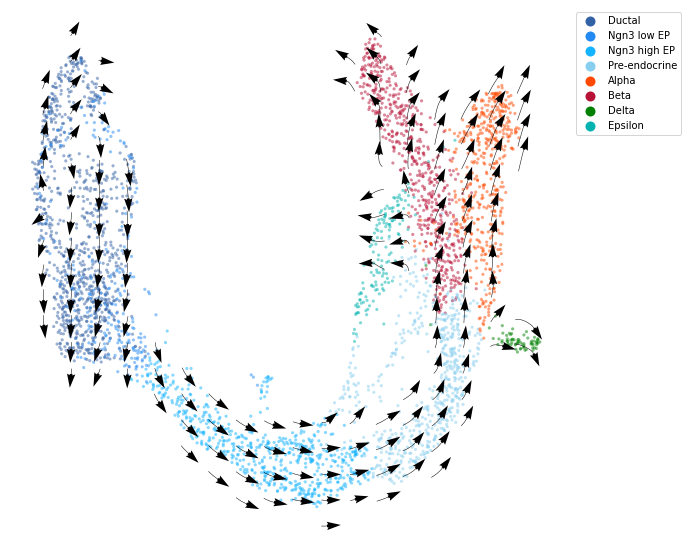

In [3]:
# Compute cell velocity
cellDancer_df=cd.compute_cell_velocity.compute(cellDancer_df=cellDancer_df, projection_neighbor_size=100)

# Plot cell velocity
fig, ax = plt.subplots(figsize=(10,10))
im = cdplt.cell.scatter_cell(ax, cellDancer_df, colors=colormap.colormap_pancreas, alpha=0.5, s=10, velocity=True, legend='on', min_mass=5, arrow_grid=(20,20))
ax.axis('off')
plt.show()

## Kinetic UMAP based on alpha, beta, and gamma

After obtaining the prediction result, ```celldancer.embedding_kinetic_para.embedding()``` could build UMAP based on the predicted alpha, beta, gamma, or all of the three.

In [4]:
cellDancer_df=cd.embedding_kinetic_para.embedding(cellDancer_df,'alpha')
cellDancer_df=cd.embedding_kinetic_para.embedding(cellDancer_df,'beta')
cellDancer_df=cd.embedding_kinetic_para.embedding(cellDancer_df,'gamma')
cellDancer_df=cd.embedding_kinetic_para.embedding(cellDancer_df,'alpha_beta_gamma')

UMAP could be visualized with ```celldancer.plotting.cell.plot_kinetic_para()``` depending on the selection of kinetic parameter(s). This result shows that our kinetic parameters could reflect cell sub-population. The spliced reads of one gene could be visualized when specifying the particular gene in ```celldancer.plotting.cell.plot_kinetic_para()```.

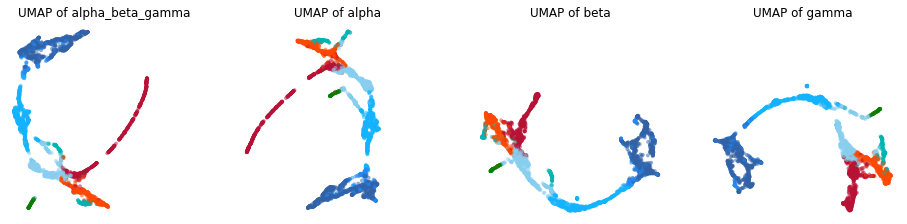

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(16,8))
cd.cdplt.cell.plot_kinetic_para(ax[0], 'alpha_beta_gamma', cellDancer_df, color_map=colormap.colormap_pancreas)
cd.cdplt.cell.plot_kinetic_para(ax[1], 'alpha', cellDancer_df, color_map=colormap.colormap_pancreas)
cd.cdplt.cell.plot_kinetic_para(ax[2], 'beta', cellDancer_df, color_map=colormap.colormap_pancreas)
cd.cdplt.cell.plot_kinetic_para(ax[3], 'gamma', cellDancer_df, color_map=colormap.colormap_pancreas)